# Prep and overview of the dataset

In [2]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading data

data = pd.read_csv('trip.csv')

In [4]:
# Checking the first five rows

data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0


In [5]:
# Check out the data types for each column

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22701 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22701 non-null  object 
 1   tpep_pickup_datetime   22701 non-null  object 
 2   tpep_dropoff_datetime  22701 non-null  object 
 3   payment_method         22701 non-null  object 
 4   passenger_count        22701 non-null  int64  
 5   trip_distance          22701 non-null  float64
 6   fare_amount            22698 non-null  float64
 7   tip_amount             22701 non-null  float64
 8   tolls_amount           22701 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.6+ MB


In [6]:
# Get the feel of the values in each column --> any aberrations?

data.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22701.000000,22701.000000,22698.000000,22701.000000,22701.000000
mean,1.643584,2.913400,13.024009,1.835745,0.312514
std,1.304942,3.653023,13.240074,2.800537,1.399153
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000
max,36.000000,33.960000,999.990000,200.000000,19.100000


Investigate: 

1. passenger_count: 
    - min: 0? 
    - max: 36? do we have a minibus in service? --> worth checking
    
2. trip_distance: 
    - min: 0
    - max: 999.99? possible outlier --> check with a scatterplot
    
3. fare_amount: 
    - min: -120? 
    - max: tied to trip_distance's max value?

4. tip_amount: check the percentage to fare_amount?

But first...

# Missing values

## Check for columns with missing values

In [7]:
# How many per column? 

data.isna().sum()

passenger_name           0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
payment_method           0
passenger_count          0
trip_distance            0
fare_amount              3
tip_amount               0
tolls_amount             0
dtype: int64

In [8]:
# and the ratio? 

data.isna().mean()

passenger_name           0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
payment_method           0.000000
passenger_count          0.000000
trip_distance            0.000000
fare_amount              0.000132
tip_amount               0.000000
tolls_amount             0.000000
dtype: float64

In [9]:
# What do the three rows with null values in fare_amount look like? 

fare_amount_na = data[data['fare_amount'].isna()]
fare_amount_na

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
52,Benjamin Johnson,04/04/2017 4:22:03 PM,04/04/2017 4:35:30 PM,Cash,1,2.20,NaN,0.0,0.00
189,Maria Ibarra,08/21/2017 12:40:25 PM,08/21/2017 1:12:31 PM,Debit Card,3,15.20,NaN,5.0,0.00
244,Tina Avila,08/09/2017 8:32:09 AM,08/09/2017 9:31:11 AM,Cash,1,15.89,NaN,10.0,5.76


In [10]:
# Let's save the index for these 3 rows for future reference

fare_amount_na_index = fare_amount_na.index
fare_amount_na_index

Int64Index([52, 189, 244], dtype='int64')

## Handling the three rows with missing values

Assumption: 'trip_distance' must be a paramount factor in calculating 'fare_amount'. 

Solution: If there are other rows with the same 'trip_distance', let's replace the 'fare_amount' for the 3 rows with the median of other inputs with the equivalent 'trip_distance'.  


[trip_distance]
1. data.loc[52]: 2.20
2. data.loc[189]: 15.20
3. data.loc[244]: 15.89

In [11]:
# Let's start with the first row

td_2_20 = data[data['trip_distance'] == 2.20]
td_2_20

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
52,Benjamin Johnson,04/04/2017 4:22:03 PM,04/04/2017 4:35:30 PM,Cash,1,2.2,NaN,0.00,0.0
192,Dylan Meyer,10/05/2017 6:49:25 PM,10/05/2017 7:01:35 PM,Debit Card,2,2.2,10.5,1.60,0.0
431,Dr. Michael Combs,05/25/2017 4:34:53 PM,05/25/2017 5:03:26 PM,Debit Card,1,2.2,17.0,5.60,0.0
495,Melissa Brown,12/19/2017 8:46:45 PM,12/19/2017 8:57:10 PM,Cash,1,2.2,10.0,1.70,0.0
559,Anna Schwartz,05/01/2017 5:38:23 PM,05/01/2017 5:52:12 PM,Cash,1,2.2,10.5,2.45,0.0
...,...,...,...,...,...,...,...,...,...
22392,Clinton Shaw,02/04/2017 2:11:46 AM,02/04/2017 2:23:22 AM,Credit Card,1,2.2,10.0,0.00,0.0
22420,Thomas Davenport,08/14/2017 4:43:26 PM,08/14/2017 4:54:12 PM,Credit Card,1,2.2,10.0,2.35,0.0
22465,Vicki Murray,04/16/2017 9:17:00 PM,04/16/2017 9:29:31 PM,Cash,1,2.2,10.5,2.00,0.0
22649,Dawn York,11/15/2017 10:23:47 PM,11/15/2017 10:37:09 PM,Credit Card,1,2.2,10.5,0.00,0.0


In [12]:
# Many rows with the same 'trip_distance'; let's find the median value

td_2_20['fare_amount'].median()

10.5

In [13]:
# Replace the 'fare_amount' for row 52 with the median value

data['fare_amount'].loc[52] = td_2_20['fare_amount'].median()

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [14]:
# Look up other rows with the same 'trip_distance' as the second one

td_15_20 = data[data['trip_distance'] == 15.20]
td_15_20

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
189,Maria Ibarra,08/21/2017 12:40:25 PM,08/21/2017 1:12:31 PM,Debit Card,3,15.2,NaN,5.00,0.00
1392,Amy Glenn,11/14/2017 5:29:23 PM,11/14/2017 6:38:25 PM,Cash,1,15.2,52.0,0.00,0.00
8600,John Howe,01/05/2017 11:36:21 AM,01/05/2017 12:05:40 PM,Debit Card,1,15.2,43.0,10.00,5.54
19017,Cody Graves,02/17/2017 2:35:33 PM,02/17/2017 3:11:26 PM,Cash,1,15.2,43.0,0.00,5.54
21231,Katherine Jennings,02/15/2017 9:33:21 PM,02/15/2017 9:58:50 PM,Cash,1,15.2,42.0,8.65,0.00


In [15]:
# Found a few; let's replace with the median value

data['fare_amount'].loc[189] = td_15_20['fare_amount'].median()

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [16]:
# And finally the last one

data[data['trip_distance'] == 15.89]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
244,Tina Avila,08/09/2017 8:32:09 AM,08/09/2017 9:31:11 AM,Cash,1,15.89,NaN,10.0,5.76


In [17]:
# No other rows with the same 'trip_distance'; let's drop this one (# columns: 1 down from 22,701)

data = data.drop(244, axis=0)

In [18]:
# Check if all missing values have been treated 

data.isna().mean()

passenger_name           0.0
tpep_pickup_datetime     0.0
tpep_dropoff_datetime    0.0
payment_method           0.0
passenger_count          0.0
trip_distance            0.0
fare_amount              0.0
tip_amount               0.0
tolls_amount             0.0
dtype: float64

# Outliers

Let's go back to the suspicious numbers we encountered earlier: 

1. passenger_count: 
    - min: 0? 
    - max: 36? do we have a minibus in service? --> worth checking
    
2. trip_distance: 
    - min: 0
    - max: 999.99? possible outlier --> check with a scatterplot
    
3. fare_amount: 
    - min: -120? 
    - max: tied to trip_distance's max value?

4. tip_amount: check the percentage to fare_amount?


In [19]:
# Let's have another look at the dataset with no missing values

data.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22700.000000,22700.000000,22700.000000,22700.000000,22700.000000
mean,1.643612,2.912828,13.025219,1.835385,0.312274
std,1.304964,3.652088,13.240996,2.800075,1.398717
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000
max,36.000000,33.960000,999.990000,200.000000,19.100000


## passenger_count

<AxesSubplot:ylabel='passenger_count'>

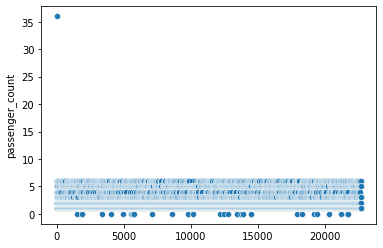

In [20]:
# Check for outliers with a scatterplot

sns.scatterplot(x = data.index, y = data['passenger_count'])

In [21]:
# Clearly see one; let's look at it in detail

data[data['passenger_count'] == data.passenger_count.max()]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
64,Manuel Dickson,10/05/2017 9:39:28 AM,10/05/2017 9:42:32 AM,Debit Card,36,0.22,21.5,0.0,0.0


In [22]:
# Seems like it will only create an unnecessary noise; let's drop this row

data = data.drop(64, axis=0)

In [23]:
# Checking if it's been succesfully dropped (# columns: 1 down from 22,700)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22699 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22699 non-null  object 
 1   tpep_pickup_datetime   22699 non-null  object 
 2   tpep_dropoff_datetime  22699 non-null  object 
 3   payment_method         22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   fare_amount            22699 non-null  float64
 7   tip_amount             22699 non-null  float64
 8   tolls_amount           22699 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.7+ MB


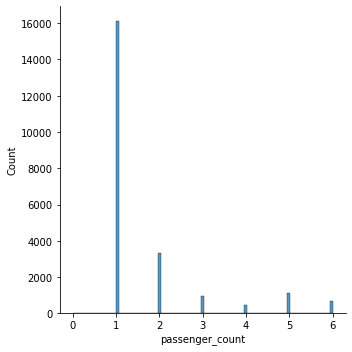

In [24]:
# Check one last time with a graph? 

sns.displot(data['passenger_count'])

## trip_distance

### min 0

Rows with 0 'trip_distance' seem erroneous - is it? 

In [25]:
# Let's see if we have only a few of these

data['trip_distance'][data['trip_distance'] == 0].count()

148

In [26]:
# That's a lot; let's look at a few...

td_0 = data[data['trip_distance'] == 0]
td_0

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
129,Linda Kaufman,06/22/2017 8:05:33 AM,06/22/2017 8:05:40 AM,Debit Card,1,0.0,20.0,0.00,0.0
248,Erik Perez,09/18/2017 8:50:53 PM,09/18/2017 8:51:03 PM,Cash,1,0.0,2.5,0.00,0.0
293,Deborah Sanford,10/04/2017 7:46:24 PM,10/04/2017 7:46:50 PM,Cash,1,0.0,2.5,0.00,0.0
321,Ryan Hughes,02/22/2017 4:01:44 AM,02/22/2017 4:01:53 AM,Cash,1,0.0,2.5,0.00,0.0
426,David Parker,01/14/2017 7:00:26 AM,01/14/2017 7:00:53 AM,Cash,1,0.0,2.5,6.70,0.0
...,...,...,...,...,...,...,...,...,...
22192,Angela French,10/16/2017 8:34:07 AM,10/16/2017 8:34:10 AM,Credit Card,1,0.0,2.5,0.00,0.0
22327,Kelsey Rogers,07/21/2017 11:30:29 PM,07/21/2017 11:31:12 PM,Debit Card,1,0.0,16.8,3.42,0.0
22385,Joseph Castillo,01/07/2017 4:48:42 AM,01/07/2017 4:51:03 AM,Cash,1,0.0,10.0,0.00,0.0
22568,Christine Edwards,03/07/2017 2:24:47 AM,03/07/2017 2:24:50 AM,Credit Card,1,0.0,0.0,0.00,0.0


In [27]:
# Quite a few charged 2.5 as 'fare_amount' with 0 'trip_distance'; could be a cancellation penalty
# How many are there above 2.5? What do those rows look like?  

fa_non_2_5 = td_0[td_0['fare_amount'] != 2.5]
fa_non_2_5

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
129,Linda Kaufman,06/22/2017 8:05:33 AM,06/22/2017 8:05:40 AM,Debit Card,1,0.0,20.0,0.00,0.00
472,Steven Avery,12/07/2017 2:39:18 PM,12/07/2017 2:39:23 PM,Debit Card,1,0.0,34.0,6.96,0.00
474,Nancy Knight,06/20/2017 6:57:39 PM,06/20/2017 6:57:39 PM,Debit Card,1,0.0,9.5,0.00,0.00
574,Craig Watson,07/18/2017 1:29:06 PM,07/18/2017 1:29:19 PM,Cash,1,0.0,52.0,11.71,5.76
797,Jason Sanchez,11/30/2017 7:11:34 AM,11/30/2017 7:11:34 AM,Cash,1,0.0,8.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...
22028,Eduardo Jenkins,07/27/2017 7:44:24 AM,07/27/2017 7:44:24 AM,Credit Card,1,0.0,10.5,0.00,0.00
22045,Kelly Perez MD,07/06/2017 10:27:11 AM,07/06/2017 10:40:07 AM,Cash,1,0.0,52.0,0.00,0.00
22327,Kelsey Rogers,07/21/2017 11:30:29 PM,07/21/2017 11:31:12 PM,Debit Card,1,0.0,16.8,3.42,0.00
22385,Joseph Castillo,01/07/2017 4:48:42 AM,01/07/2017 4:51:03 AM,Cash,1,0.0,10.0,0.00,0.00


<AxesSubplot:xlabel='tip_amount', ylabel='fare_amount'>

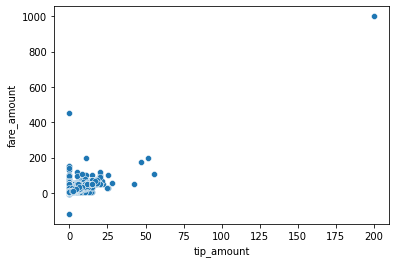

In [28]:
# Some don't even have tip_amount. Does 'tip_amount' tie into 'fare_amount'?

sns.scatterplot(x = data['tip_amount'], y = data['fare_amount'])

In [29]:
# One is clearly an outlier. 

fa_non_2_5.sort_values(by='fare_amount', ascending=False)

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
20314,Nicholas Thomas,12/19/2017 9:40:46 AM,12/19/2017 9:40:55 AM,Cash,2,0.0,450.00,0.00,0.00
15476,James Dyer MD,06/06/2017 8:55:01 PM,06/06/2017 8:55:06 PM,Debit Card,1,0.0,200.00,11.00,0.00
12513,Mr. Wesley Reyes,12/17/2017 6:24:24 PM,12/17/2017 6:24:42 PM,Cash,1,0.0,175.00,46.69,11.75
11271,Daniel Carrillo,06/19/2017 12:51:17 AM,06/19/2017 12:52:12 AM,Cash,2,0.0,120.00,20.00,11.52
7283,Phillip Vasquez,01/01/2017 3:02:53 AM,01/01/2017 3:03:02 AM,Credit Card,1,0.0,100.00,20.16,0.00
...,...,...,...,...,...,...,...,...,...
14285,Mark Reed,05/03/2017 7:44:28 PM,05/03/2017 7:44:38 PM,Debit Card,1,0.0,0.01,0.00,0.00
5724,William Holland,06/12/2017 12:08:55 PM,06/12/2017 12:08:57 PM,Debit Card,1,0.0,0.00,0.00,0.00
10508,Travis Vega,03/30/2017 3:14:26 AM,03/30/2017 3:14:28 AM,Debit Card,1,0.0,0.00,0.00,0.00
22568,Christine Edwards,03/07/2017 2:24:47 AM,03/07/2017 2:24:50 AM,Credit Card,1,0.0,0.00,0.00,0.00


In [30]:
# Let's minimise the noise by dropping it. 

data = data.drop(20314, axis=0)

In [31]:
# (# columns: 1 down from 22,699)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22698 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22698 non-null  object 
 1   tpep_pickup_datetime   22698 non-null  object 
 2   tpep_dropoff_datetime  22698 non-null  object 
 3   payment_method         22698 non-null  object 
 4   passenger_count        22698 non-null  int64  
 5   trip_distance          22698 non-null  float64
 6   fare_amount            22698 non-null  float64
 7   tip_amount             22698 non-null  float64
 8   tolls_amount           22698 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.7+ MB


### 'trip_distance' and 'fare_amount'

Assumption: We expect to see a strong correlation between these two. 

<AxesSubplot:xlabel='trip_distance', ylabel='fare_amount'>

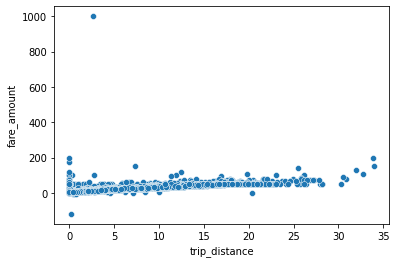

In [32]:
sns.scatterplot(x = data['trip_distance'], y = data['fare_amount'])

In [33]:
# One stands out to be an outlier

data[data['fare_amount'] == data['fare_amount'].max()]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
8478,Alexis Hanson,02/06/2017 5:50:10 AM,02/06/2017 5:51:08 AM,Credit Card,1,2.6,999.99,200.0,0.0


In [34]:
# Let's drop it for sure

data = data.drop(8478, axis=0)

In [35]:
# Checking if it's been deleted successfully 

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22697 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22697 non-null  object 
 1   tpep_pickup_datetime   22697 non-null  object 
 2   tpep_dropoff_datetime  22697 non-null  object 
 3   payment_method         22697 non-null  object 
 4   passenger_count        22697 non-null  int64  
 5   trip_distance          22697 non-null  float64
 6   fare_amount            22697 non-null  float64
 7   tip_amount             22697 non-null  float64
 8   tolls_amount           22697 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.7+ MB


# Extra stuff

1. Adding a 'Card' column
2. Adding a 'pickup_date' column 
3. Adding a 'total_paid' column

## Adding a 'Card' column

Let's make an extra column that denotes both 'Credit Card' and 'Debit Card' input as 'Card'

In [36]:
# Creating a new column 'Card'

data['Card'] = data['payment_method'].replace({'Credit Card': 'Card','Debit Card':'Card'})

In [37]:
# Check if the column has been created 

data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,Card
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0,Card
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0,Card
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0,Card
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0,Cash
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0,Card


## Adding a 'pickup_date' column 

Let's extract the pick-up dates from the 'tpep_pickup_datetime' column

In [39]:
# Importing the pertinent library 

from datetime import datetime 

In [40]:
# Extracting only the date part from 'tpep_pickup_datetime'

data['pickup_date'] = data['tpep_pickup_datetime'].str.split().apply(lambda x: x[0])

In [41]:
# Checking if the column has been created

data

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,Card,pickup_date
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.00,Card,03/25/2017
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.00,Card,04/11/2017
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.00,Card,12/15/2017
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.00,Cash,05/07/2017
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.00,Card,04/15/2017
...,...,...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4.0,0.00,0.00,Cash,02/24/2017
22697,Monique Williams,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,Cash,1,16.71,52.0,14.64,5.76,Cash,08/06/2017
22698,Drew Graves,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Debit Card,1,0.42,4.5,0.00,0.00,Card,09/04/2017
22699,Jonathan Copeland,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Debit Card,1,2.36,10.5,1.70,0.00,Card,07/15/2017


In [42]:
# Checking for data types

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22697 entries, 0 to 22700
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22697 non-null  object 
 1   tpep_pickup_datetime   22697 non-null  object 
 2   tpep_dropoff_datetime  22697 non-null  object 
 3   payment_method         22697 non-null  object 
 4   passenger_count        22697 non-null  int64  
 5   trip_distance          22697 non-null  float64
 6   fare_amount            22697 non-null  float64
 7   tip_amount             22697 non-null  float64
 8   tolls_amount           22697 non-null  float64
 9   Card                   22697 non-null  object 
 10  pickup_date            22697 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 2.1+ MB


In [43]:
# Making sure the data type for 'pickup-date' is "datetime64"

data['pickup_date'] = pd.to_datetime(data['pickup_date'])

In [44]:
# Checking here

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22697 entries, 0 to 22700
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   passenger_name         22697 non-null  object        
 1   tpep_pickup_datetime   22697 non-null  object        
 2   tpep_dropoff_datetime  22697 non-null  object        
 3   payment_method         22697 non-null  object        
 4   passenger_count        22697 non-null  int64         
 5   trip_distance          22697 non-null  float64       
 6   fare_amount            22697 non-null  float64       
 7   tip_amount             22697 non-null  float64       
 8   tolls_amount           22697 non-null  float64       
 9   Card                   22697 non-null  object        
 10  pickup_date            22697 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(5)
memory usage: 2.1+ MB


## Adding a 'total_paid' column

Let's add up all the amounts paid per trip. 
i.e. 'fare_amount', 'tip_amount', 'tolls_amount'

In [45]:
# Making sure the data types of the 3 columns match up

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22697 entries, 0 to 22700
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   passenger_name         22697 non-null  object        
 1   tpep_pickup_datetime   22697 non-null  object        
 2   tpep_dropoff_datetime  22697 non-null  object        
 3   payment_method         22697 non-null  object        
 4   passenger_count        22697 non-null  int64         
 5   trip_distance          22697 non-null  float64       
 6   fare_amount            22697 non-null  float64       
 7   tip_amount             22697 non-null  float64       
 8   tolls_amount           22697 non-null  float64       
 9   Card                   22697 non-null  object        
 10  pickup_date            22697 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(5)
memory usage: 2.1+ MB


In [46]:
# Adding them up

data['total_paid'] = data['fare_amount'] + data['tip_amount'] + data['tolls_amount']

In [47]:
# Checking

data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,Card,pickup_date,total_paid
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0,Card,2017-03-25,15.76
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0,Card,2017-04-11,20.00
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0,Card,2017-12-15,7.95
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0,Cash,2017-05-07,26.89
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0,Card,2017-04-15,16.50


In [48]:
# + Minor stuff, but wanted to make sure the formant of the column names match up! 

data = data.rename({'Card':'card'}, axis=1)

In [49]:
# Checking one last time before we finish up

data

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,card,pickup_date,total_paid
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.00,Card,2017-03-25,15.76
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.00,Card,2017-04-11,20.00
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.00,Card,2017-12-15,7.95
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.00,Cash,2017-05-07,26.89
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.00,Card,2017-04-15,16.50
...,...,...,...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4.0,0.00,0.00,Cash,2017-02-24,4.00
22697,Monique Williams,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,Cash,1,16.71,52.0,14.64,5.76,Cash,2017-08-06,72.40
22698,Drew Graves,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Debit Card,1,0.42,4.5,0.00,0.00,Card,2017-09-04,4.50
22699,Jonathan Copeland,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Debit Card,1,2.36,10.5,1.70,0.00,Card,2017-07-15,12.20


# Insights agained/comments

1. 실제 데이터를 가지고 배운 것을 가지고 자유롭게 실험해보면서 복습할 수 있어 행복했습니다. 
2. 데이터가 이상하다고 판단될 때 데이터의 다른 부분을 보고 어떻게 할지 선택하는 것이 큰 훈련이라는 것을 알게 되었습니다. 
3. 시각화를 통해 튀는 자료를 찾아내는 법을 배웠습니다. 
4. 'trip_distance'는 0인데 'fare_amount'가 2.5보다 큰 값들이 어떤 연유에서 발생했는지, 어떻게 처리해야 할지 고민했는데 가장 튀는 값만 처리하고 넘어갔습니다. 좀 더 잘 다룰 수 있는 방법을 동료들과 논의해보고 싶습니다. 